## **About The Dataset:**

The dataset given here contains the data about the sales of the product. The dataset is about the advertising cost incurred by the business on various advertising platforms. Below is the description of all the columns in the dataset:

1. TV: Advertising cost spent in dollars for advertising on TV;
2. Radio: Advertising cost spent in dollars for advertising on Radio;
3. Newspaper: Advertising cost spent in dollars for advertising on Newspaper;
4. Sales: Number of units sold;

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = "/content/drive/MyDrive/Advertisement cost data.csv"
df = pd.read_csv(path)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Checking for nulls if any

In [3]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## Checking for duplicates if any

In [4]:
df.duplicated().value_counts()

False    200
dtype: int64

## Visualizing the relationship between the amount spent on advertising on TV and units sold:

In [5]:
import plotly.express as px
import plotly.graph_objects as go

In [6]:
fig = px.scatter(data_frame = df, x="Sales",y="TV", size="TV", trendline="ols")
fig.show()

## Visualizing the relationship between the amount spent on advertising on newspapers and units sold:

In [7]:
fig = px.scatter(data_frame = df, x="Sales",y="Newspaper", size="Newspaper", trendline="ols")
fig.show()

## Visualizing the relationship between the amount spent on advertising on radio and units sold:

In [9]:
fig = px.scatter(data_frame = df, x="Sales", y="Radio", size="Radio", trendline="ols")
fig.show()

### Out of all the amount spent on advertising on various platforms, It can be seen that the amount spent on **advertising the product on TV results in more sales of the product.**

## Checking the correlation between all the columns with the Sales column

In [10]:
df.corrwith(df['Sales'])

TV           0.901208
Radio        0.349631
Newspaper    0.157960
Sales        1.000000
dtype: float64

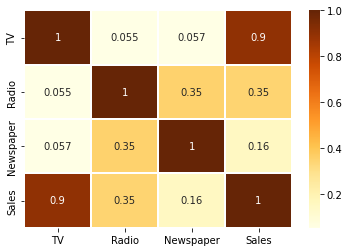

In [16]:
sns.heatmap(df.corr(), annot=True, linewidths=1, cmap='YlOrBr')

## Future Sales Prediction Model

In [17]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [18]:
x = df[['TV', 'Radio', 'Newspaper']].values
y = df['Sales'].values

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [23]:
print(model.score(x_test, y_test))

0.9059011844150825


In [24]:
y_pred = model.predict(x_test)

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
  
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 1.2748262109549349
MSE: 2.907756910271093
RMSE: 1.7052146229349234


## Making an Actual Prediction

In [27]:
#features = [[TV, Radio, Newspaper]]
features = np.array([[230.1, 37.8, 69.2]])
print(model.predict(features))

[21.37254028]


### **This is how we can train a machine learning model to predict the future sales of a product. Predicting the future sales of a product helps a business manage the manufacturing and advertising cost of the product.** 